In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize

In [29]:
# Generating data
X = np.random.randint(0, 10, 30).reshape(6, 5)

y = np.random.randint(0, 5, 6)

In [30]:
print(X.shape)
print(y.shape)

(6, 5)
(6,)


In [31]:
def one_hot(y,k):
    y_hot = np.zeros((len(y),k)) # Creating the zero matrix
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

In [32]:
one_hot(y,5)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
def softmax(z):
    # z = w . X
    y_hat = np.exp(z - np.max(z))
    for i in range(len(z)):
        y_hat[i] /= np.sum(y_hat[i])
    return y_hat

In [34]:
w =np.random.randint(0,9,60).reshape(10,6)

In [35]:
z = np.dot(w,X)
z

array([[ 94, 130,  59,  74,  77],
       [ 92, 142,  88,  66,  62],
       [ 94, 124,  82,  62,  55],
       [101, 133,  73,  66,  74],
       [ 82, 103,  70,  66,  66],
       [116, 148, 106,  90,  62],
       [ 30,  63,  48,  54,  56],
       [ 75, 107,  52,  80,  67],
       [100, 122,  50,  78,  76],
       [ 57,  70,  36,  38,  29]])

In [36]:
B = softmax(z)
pd.DataFrame(B)

,0,1,2,3,4
0,2.319523e-16,1.000000,1.462486e-31,4.780893e-25,9.602680e-24
1,1.928750e-22,1.000000,3.532629e-24,9.854155e-34,1.804851e-35
2,9.357623e-14,1.000000,5.749522e-19,1.185065e-27,1.080639e-30
3,1.266417e-14,1.000000,8.756511e-27,7.984904e-30,2.380266e-26
4,7.582560e-10,1.000000,4.658886e-15,8.533048e-17,8.533048e-17
5,1.266417e-14,1.000000,5.749522e-19,6.470235e-26,4.473779e-38
6,4.654066e-15,0.998965,3.055859e-07,1.232821e-04,9.109386e-04
7,1.266417e-14,1.000000,1.299581e-24,1.879529e-12,4.248354e-18
8,2.789468e-10,1.000000,5.380186e-32,7.781132e-20,1.053062e-20
9,2.260324e-06,0.999998,1.713905e-15,1.266414e-14,1.562879e-18


In [37]:
#b = np.nan_to_num(B)
#pd.DataFrame(b)

In [38]:
B[3].sum()

1.0

In [39]:
B.sum()

10.0

In [90]:
def logistic_fit(X, y, lr, k, epochs):
    n, m = X.shape
    w = np.random.random((m, k))
    losses = []
    for epoch in range(epochs):
        z  = X @ w
        y_hat = softmax(z)
        y_hot = one_hot(y, k)
        w_grad = (1/n)*np.dot(X.T, (y_hat - y_hot))
        w = w - lr*w_grad
        loss = - np.mean(np.log(y_hat[np.arange(len(y)), y]))
        print(loss)
        losses.append(loss)
                
    return w, losses

In [86]:
w_hat

array([[ 0.45640193,  0.41439964,  0.95711628,  0.17336215,  0.37843948,
         0.79843923],
       [ 0.19931854,  0.67561571,  0.34553143,  0.84036339,  0.52463881,
         0.82318835],
       [ 0.23987691,  0.90907458,  0.19172962,  0.43703151,  0.08258351,
         0.53051672],
       [ 0.8420249 ,  0.38602562,  0.18760448,  0.65329403,  0.85769916,
         0.73452827],
       [ 0.91251635,  0.73184146,  0.50525887,  0.81333924,  0.86253313,
        -0.02400039]])

In [88]:
# Not working
def logistic_fit_s(X, y,k):
    n, m = X.shape
    w = np.random.random((m, k))
    #loss = []
    z  = X @ w
    y_hat = softmax(z)
    y_hot = one_hot(y, k)
    w_grad = (1/n)*np.dot(w, (y_hat - y_hot))
    #w = w - lr*w_grad
    loss = - np.mean(np.log(y_hat[np.arange(len(y)), y]))
    print(loss)
    snd_order = minimize(w_grad,w_hat, method='BFGS')
        
    return snd_order
#Not working

In [92]:
def logistic_fit_s2(X, y, lr, k, epochs):
    n, m = X.shape
    w = np.random.random((m, k))
    losses = []
    for epoch in range(epochs):
        z  = X @ w
        y_hat = softmax(z)
        y_hot = one_hot(y, k)
        w_grad = (1/n)*np.dot(X.T, (y_hat - y_hot))
        w = w - lr*w_grad
        loss = - np.mean(np.log(y_hat[np.arange(len(y)), y]))
        print(loss)
        losses.append(loss)
        snd_order = minimize(losses,w_grad, method='BFGS')
                
    return w, losses, snd_order

In [93]:
minimize(w_grad,losses, method='BFGS')

5.445305396787268


TypeError: 'numpy.ndarray' object is not callable

In [95]:
(1/n)*np.dot(X.T, (y_hat - y_hot))

NameError: name 'y_hat' is not defined

In [109]:
k=6
n, m = X.shape
w = np.random.random((m, k))
z  = X @ w
y_hat = softmax(z)
y_hot = one_hot(y, k)
grad=(1/n)*np.dot(X.T, (y_hat - y_hot))
grad

array([[ 0.84784219,  0.00489429, -0.99941085, -1.49788062, -0.59197271,
         2.23652771],
       [ 1.74789264,  0.02972774, -1.49808058, -2.14477624, -0.81931699,
         2.68455343],
       [ 0.52308565,  0.01781197, -0.99871652, -2.15609728,  0.29928156,
         2.31463461],
       [ 0.56118023,  0.03251785, -0.99775895, -0.64576067, -0.07770862,
         1.12753016],
       [ 1.14060407,  0.02832357, -1.3315865 , -0.64611782, -0.21643113,
         1.02520781]])

In [115]:
w = n, m = X.shape
k=6
w = np.random.random((m, k))

In [121]:
def loss(X, y_hot, w):
    Z = - X @ w
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ w @ y_hot.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, y_hot, W, m):
    Z = - X @ W
    P = softmax(Z)
    n = X.shape[0]
    gd = 1/n * (X.T @ (y_hot - P)) + 2 * m * W
    return gd

In [122]:
loss(X,y_hot,w)

3.7232720229726284

In [123]:
gradient(X,y_hot,w,6)

array([[12.63563106, 11.46398026,  3.53753016,  6.9417849 ,  4.16849622,
        -0.04000163],
       [ 9.95800899,  0.82549944,  3.71452638, 11.67339855, 11.6678761 ,
         1.15221519],
       [ 9.20279947,  8.81466919,  1.84136521,  4.9094255 ,  6.6613211 ,
        10.96706454],
       [ 6.14489268,  7.18302396, 12.55628778,  2.03265566, 10.03943246,
         1.91575725],
       [ 7.72660851,  4.12290396,  4.48368634,  5.86945487,  0.80256951,
         1.50834937]])

In [127]:
def logistic_fit_s2(X, y, lr, k, epochs):
    n, m = X.shape
    w = np.random.random((m, k))
    losses = []
    for epoch in range(epochs):
        z  = X @ w
        y_hat = softmax(z)
        y_hot = one_hot(y, k)
        w_grad = (1/n)*np.dot(X.T, (y_hat - y_hot))
        w = w - lr*w_grad
        loss = - np.mean(np.log(y_hat[np.arange(len(y)), y]))
        #print(loss)
        losses.append(loss)
        snd_order = minimize(losses,w_grad,gradient(X,y_hot,w,6), method='BFGS')
                
    return w, losses, snd_order

In [128]:
logistic_fit_s2(X,y,0.01,6,10)

TypeError: 'list' object is not callable

In [55]:
def predict(X, w):
    z = X @ w
    print(z)
    y_hat = softmax(z)
    print(y_hat)
    return np.argmax(y_hat, axis = 1)

In [63]:
w_hat, loss = logistic_fit(X, y, 0.0001, 6, 500)

5.644964150920423
5.639465280634212
5.633968726214064
5.628474493330749
5.622982587677778
5.617493014971441
5.612005780950894
5.606520891378209
5.601038352038441
5.595558168739669
5.590080347313091
5.584604893613047
5.5791318135171055
5.573661112926108
5.568192797764229
5.562726873979031
5.557263347541531
5.551802224446244
5.546343510711242
5.540887212378219
5.535433335512523
5.529981886203231
5.524532870563188
5.519086294729067
5.513642164861408
5.508200487144685
5.502761267787338
5.497324513021833
5.491890229104705
5.486458422316606
5.481029098962352
5.475602265370959
5.470177927895708
5.46475609291416
5.459336766828222
5.453919956064175
5.448505667072719
5.443093906329011
5.437684680332702
5.43227799560798
5.4268738587035985
5.421472276192911
5.416073254673911
5.410676800769269
5.405282921126346
5.39989162241724
5.394502911338811
5.389116794612707
5.383733278985395
5.378352371228179
5.372974078137236
5.367598406533623
5.362225363263312
5.3568549551972096
5.351487189231169
5.34612207

In [44]:
w_hat

array([[0.5682915 , 0.0983783 , 0.77498696, 0.68009828, 0.3274488 ,
        0.33870002],
       [0.76013215, 0.43268594, 0.05480006, 0.7004445 , 0.14413017,
        0.77499973],
       [0.04878778, 0.83140659, 0.54388055, 0.45037612, 0.95784219,
        0.30571494],
       [0.52959964, 0.27441546, 0.91979746, 0.13487666, 0.25600735,
        0.27896867],
       [0.34435716, 0.61280325, 0.8053516 , 0.51750511, 0.10733246,
        0.83776394]])

In [47]:
loss

[3.598277278632956,
 3.5961149640492924,
 3.5939591173494456,
 3.5918097105510753,
 3.5896667157369238,
 3.587530105055761,
 3.5853998507233213,
 3.583275925023202,
 3.5811583003077736,
 3.5790469489990424,
 3.5769418435895215,
 3.574842956643058,
 3.572750260795664,
 3.570663728756324,
 3.5685833333077723,
 3.5665090473072767,
 3.564440843687381,
 3.56237869545665,
 3.560322575700384,
 3.5582724575813214,
 3.5562283143403293,
 3.554190119297067,
 3.5521578458506453,
 3.5501314674802575,
 3.5481109577458034,
 3.5460962902884963,
 3.5440874388314447,
 3.5420843771802333,
 3.540087079223475,
 3.5380955189333556,
 3.536109670366161,
 3.534129507662786,
 3.5321550050492334,
 3.5301861368370973,
 3.528222877424023,
 3.526265201294171,
 3.524313083018644,
 3.522366497255916,
 3.5204254187522417,
 3.5184898223420533,
 3.5165596829483374,
 3.514634975583012,
 3.512715675347272,
 3.5108017574319352,
 3.508893197117775,
 3.506989969775825,
 3.5050920508676895,
 3.5031994159458315,
 3.50131204065

In [52]:
y_pred = predict(X, w_hat)
y_pred

[[ 6.63393137  6.94243177  8.20755757  6.31205733  3.94556431  8.17835926]
 [10.98559778 11.74849924 10.29951822 14.50510427 11.03193427 12.29068121]
 [ 8.14081206  9.11898319 11.35880847  9.18597541  7.69410481  9.27384021]
 [ 5.29806008  4.41808075  8.46557935  5.31147261  5.35148135  4.16281933]
 [ 9.84218882  9.07936978 12.16044554 11.72409041  7.45805694 11.03905166]
 [13.74676559  8.03331811 12.04371848 12.99411727  4.71522356 13.47412817]]
[[7.89667146e-02 1.07503867e-01 3.80944092e-01 5.72342437e-02
  5.36909502e-03 3.69981987e-01]
 [2.37241063e-02 5.08760937e-02 1.19461867e-02 8.01109921e-01
  2.48492650e-02 8.74944274e-02]
 [2.83879201e-02 7.55001644e-02 7.09074158e-01 8.07313563e-02
  1.81606371e-02 8.81457641e-02]
 [3.62936746e-02 1.50543072e-02 8.61920242e-01 3.67837437e-02
  3.82852511e-02 1.16627816e-02]
 [4.63130935e-02 2.15981071e-02 4.70446121e-01 3.04090791e-01
  4.26862963e-03 1.53283257e-01]
 [4.13559014e-01 1.36527072e-03 7.53205579e-02 1.94834777e-01
  4.94525426

array([2, 3, 2, 2, 2, 0], dtype=int64)

In [ ]:
def accuracy(y, y_hat):
    return np.sum(y == y_hat)/len(y)

In [49]:
accuracy(y, y_pred)

0.5

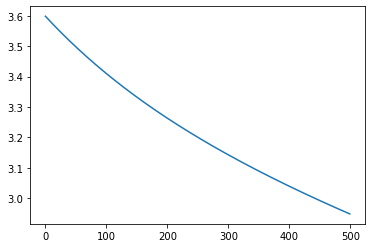

In [50]:
plt.plot(range(500), loss)

In [112]:
###############################################################################################################################

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    
X = load_iris().data
Y = load_iris().target

# fit model
model = Multiclass()
model.fit(X, Y)

# plot loss
model.loss_plot()

# predict 
model.predict(X)

# check the predicted value and the actual value
model.predict(X) == Y
view rawmulticlass-logistic.py hosted with ❤ by GitHub